# PCA Dimension Reduction: digits

In [3]:
from sklearn.datasets import load_digits
import matplotlib
import matplotlib.pyplot as plt

# data load
digits = load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

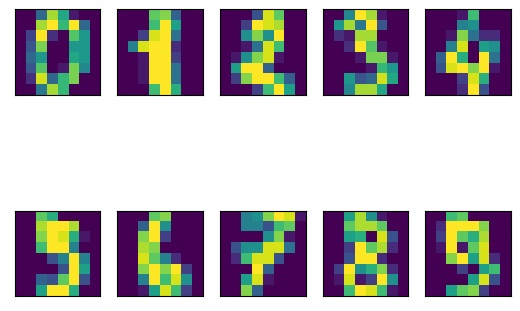

In [5]:
# subplot 객체 생성
fig, axes = plt.subplots(2, 5, #  subplot객체(2x5)를 axes에 할당
                         subplot_kw={'xticks':(), 'yticks':()}) # subplot 축 눈금 해제
# axes.ravel()
for ax, img in zip(axes.ravel(), digits.images): # axes.ravel()과 digits.images를 하나씩 할당
    ax.imshow(img)

plt.show() # 그래프 출력

In [6]:
from sklearn.decomposition import PCA

# PCA 모델을 생성

pca = PCA(n_components=2) # n_components= 주성분 갯수

pca.fit(digits.data) # PCA 적용

PCA(n_components=2)

In [7]:
# 처음 두 개의 주성분으로 숫자 데이터를 변환
digits_pca = pca.transform(digits.data) # PCA를 데이터에 적용

In [8]:
digits_pca

array([[ -1.25946644,  21.27488344],
       [  7.95761158, -20.76869856],
       [  6.99192283,  -9.95598651],
       ...,
       [ 10.80128359,  -6.96025263],
       [ -4.87210013,  12.42395401],
       [ -0.34438997,   6.36554852]])

* matplotlib text reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

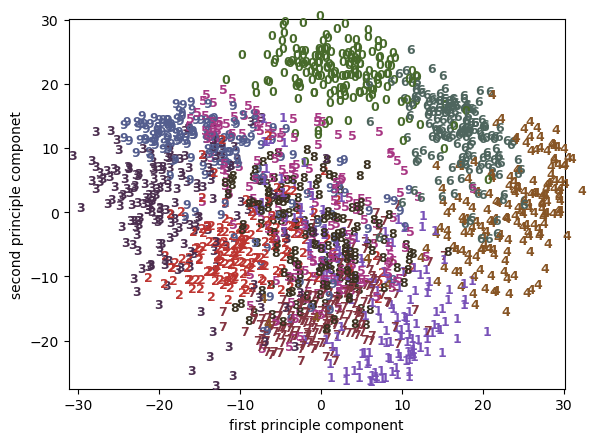

In [9]:
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
               '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']


for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도 그리기
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), # x, y, 그룹; str은 문자로 변환
             color=colors[digits.target[i]], # 산점도 색상
             fontdict={'weight':'bold', 'size':9}) # font 설정

plt.xlim(digits_pca[:, 0].min(), digits_pca[:,1].max()) # 최소, 최대
plt.ylim(digits_pca[:, 1].min(), digits_pca[:,1].max()) # 최소, 최대
plt.xlabel('first principle component') # x 축 이름
plt.ylabel('second principle componet') # y 축 이름
plt.show()

## t-SNE Dimension Reduction
* t-SNE는 비선형 차원 축소 기법으로, 고차원 데이터를 특히 2, 3차원 등으로 줄여 가시화하는데에 유용하게 사용
* PCA vs. T-SNE: https://amazelimi.tistory.com/13

In [10]:
### TSNE모델에는 transform 메소드가 없고 fit_transform만 있음
from sklearn.manifold import TSNE

# t-SNE 모델 생성 및 학습
tsne = TSNE(n_components=2, random_state=1213)
digits_tsne = tsne.fit_transform(digits.data)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
digits_tsne

array([[-58.478355 ,  -0.9680275],
       [ 23.609636 ,  23.359167 ],
       [ 30.342785 ,   0.7025423],
       ...,
       [ 19.557995 ,   3.7170146],
       [  1.7076423, -16.757784 ],
       [ 18.504353 ,  -2.4262145]], dtype=float32)

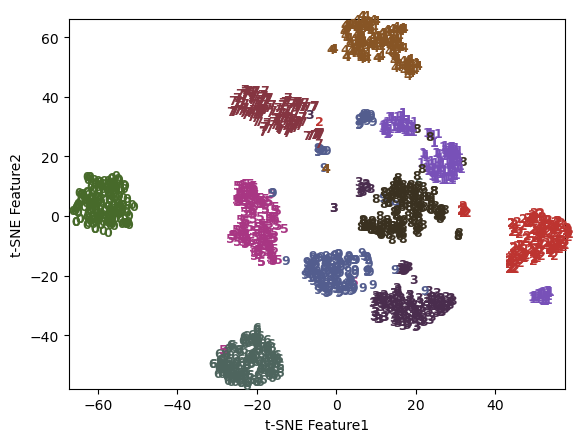

In [12]:
# 시각화
for i in range(len(digits.data)): # 0부터  digits.data까지 정수
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), # x, y , 그룹
             color=colors[digits.target[i]], # 색상
             fontdict={'weight': 'bold', 'size':9}) # font

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()) # 최소, 최대
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()) # 최소, 최대
plt.xlabel('t-SNE Feature1') # x축 이름
plt.ylabel('t-SNE Feature2') # y축 이름
plt.show() # 그래프 출력

## PCA Dimension Reduction: Iris


In [13]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

iris = load_iris()
X_reduced = PCA(n_components=3).fit_transform(iris.data)
y = iris.target

In [14]:
X_reduced

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

* Axes3D reference: https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html
* Axes3D.scatter reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html

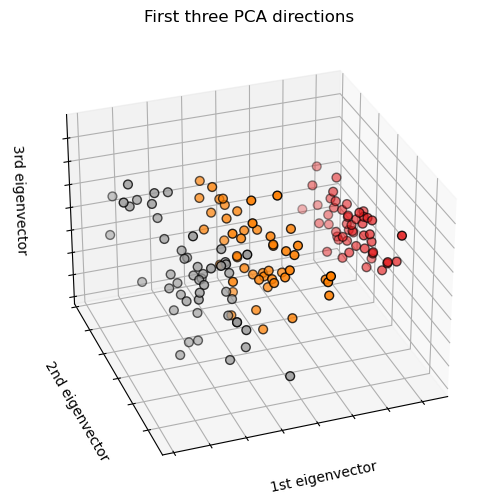

In [15]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

## 실습과제

- T-SNE를 사용해 IRIS data를 3차원으로 축소한 후 시각화해보세요.
- 이 과정에서, 다양한 parameter를 튜닝하며 실행시켜보세요.
- reference: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [16]:
def print3dscattertSNE(tsne):
    fig = plt.figure(1, figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

    ax.scatter(
        tsne[:, 0],
        tsne[:, 1],
        tsne[:, 2],
        c=y,
        cmap=plt.cm.Set1,
        edgecolor="k",
        s=40,
    )

    ax.set_title("t-SNE results for iris data")
    ax.set_xlabel("Feature 1")
    ax.xaxis.set_ticklabels([])
    ax.set_ylabel("Feature 2")
    ax.yaxis.set_ticklabels([])
    ax.set_zlabel("Feature 3")
    ax.zaxis.set_ticklabels([])
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


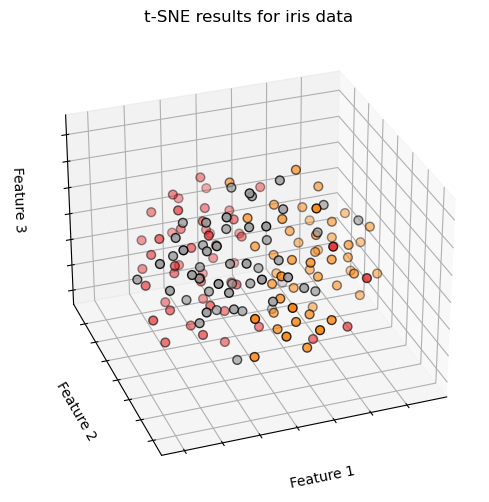

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


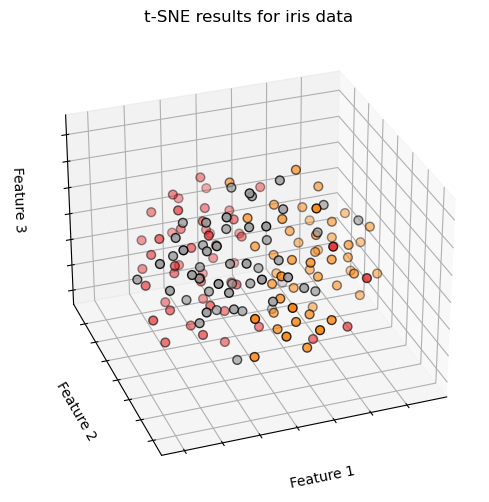

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


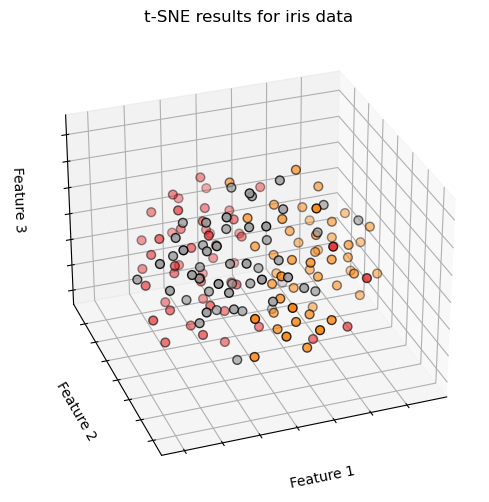

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


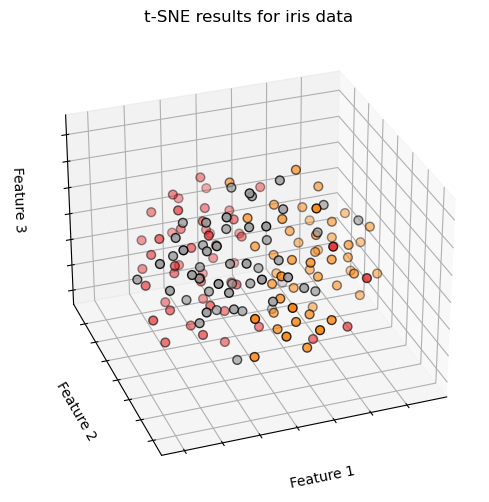

In [17]:
for perplexity in range(20, 51, 10):
    tsne = TSNE(n_components=3, random_state=1213)
    iris_tsne = tsne.fit_transform(iris.data)
    print3dscattertSNE(iris_tsne)